# ARTIFICIAL NEURAL NETWORKS
Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data Overview In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance. Dataset: "Alphabets_data.csv" The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance. Tasks

Data Exploration and Preprocessing ● Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes. ● Execute necessary data preprocessing steps including data normalization, managing missing values.
Model Implementation ● Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer. ● Divide the dataset into training and test sets. ● Train your model on the training set and then use it to make predictions on the test set.
Hyperparameter Tuning ● Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance. ● Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.
Evaluation ● Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance. ● Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning. Evaluation Criteria ● Accuracy and completeness of the implementation. ● Proficiency in data preprocessing and model development. ● Systematic approach and thoroughness in hyperparameter tuning. ● Depth of evaluation and discussion. ● Overall quality of the report. Additional Resources ● TensorFlow Documentation ● Keras Documentation We wish you the best of luck with this assignment. Enjoy exploring the fascinating world of neural networks and the power of hyperparameter tuning!

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data
data= pd.read_csv('Alphabets_data.csv')

In [3]:
# Backup of data
df= data.copy()

In [4]:
!pip install tensorflow

### Data Exploration

In [5]:
df.shape

(20000, 17)

In [6]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
df.tail()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [8]:
df.sample()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
8639,N,4,8,6,6,3,7,8,3,4,10,6,7,5,8,1,7


# Quick Data Check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


### Statistical summary

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


In [11]:
df.nunique()

letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64

# Data Preprocessing
### Identifying Duplicates

In [12]:
df.duplicated().sum()

1332

###### To Identify Duplicate Rows

In [13]:
all_duplicate_rows = df[df.duplicated(keep=False)]
print(f"Number of rows including all duplicates: {len(all_duplicate_rows)}")
print(all_duplicate_rows)

Number of rows including all duplicates: 2177
      letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
22         S     3     2      3       3      2     8     8      7      5   
37         P     3     6      4       4      2     4    14      8      1   
51         L     3     6      3       4      1     1     0      6      6   
60         N     3     3      3       5      2     7     7     13      2   
67         E     2     3      3       2      2     7     7      5      7   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19948      T     4     5      4       4      2     6    11      2      7   
19950      O     4     5      5       4      3     7     7      8      5   
19975      E     1     0      1       0      0     5     8      5      7   
19987      L     3     7      3       5      1     0     1      6      6   
19998      S     2     3      4       2      1     8     7      2      6   

       xybar  x2ybar  xy2bar  xedge  xedg

###### To Identify Duplicate Columns

In [14]:
duplicate_specific = df[df.duplicated(['letter', 'xbox','ybox','onpix','xbar','ybar','x2bar', 'y2bar'])]
print(f"Number of duplicate rows based on 'letter', 'xbox','ybox','onpix','xbar','ybar','x2bar', 'y2bar': {len(duplicate_specific)}")
print(duplicate_specific)

Number of duplicate rows based on 'letter', 'xbox','ybox','onpix','xbar','ybar','x2bar', 'y2bar': 3759
      letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
65         L     2     3      2       4      1     0     1      5      6   
179        H     4     5      5       4      4     7     7      6      6   
323        E     3     4      4       6      2     3     8      6     10   
627        I     3     7      4       5      2     7     7      0      7   
655        P     3     7      3       5      2     4    12      8      2   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19976      L     3     8      3       6      2     0     2      4      6   
19985      M     5     6      8       4      5     9     6      2      4   
19987      L     3     7      3       5      1     0     1      6      6   
19988      D     6     9      8       8      8     7     6      5      7   
19998      S     2     3      4       2      1     8     7   

### To remove Duplicates

In [15]:
df_cleaned_specific = df.drop_duplicates(subset=['letter', 'xbox','ybox','onpix','xbar','ybar','x2bar', 'y2bar'])

### Identifying Missing Values

In [16]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [17]:
# There is no missing value in given data set

In [18]:
df = df.drop('letter', axis=1, inplace=True)

### Identifying Outliers

<Axes: >

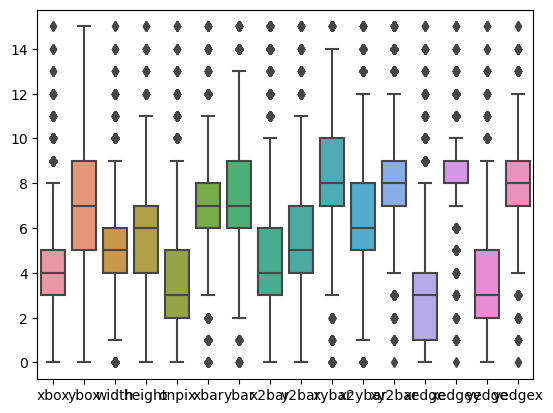

In [23]:
sns.boxplot(data)

There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

# Data Visualization

<Axes: >

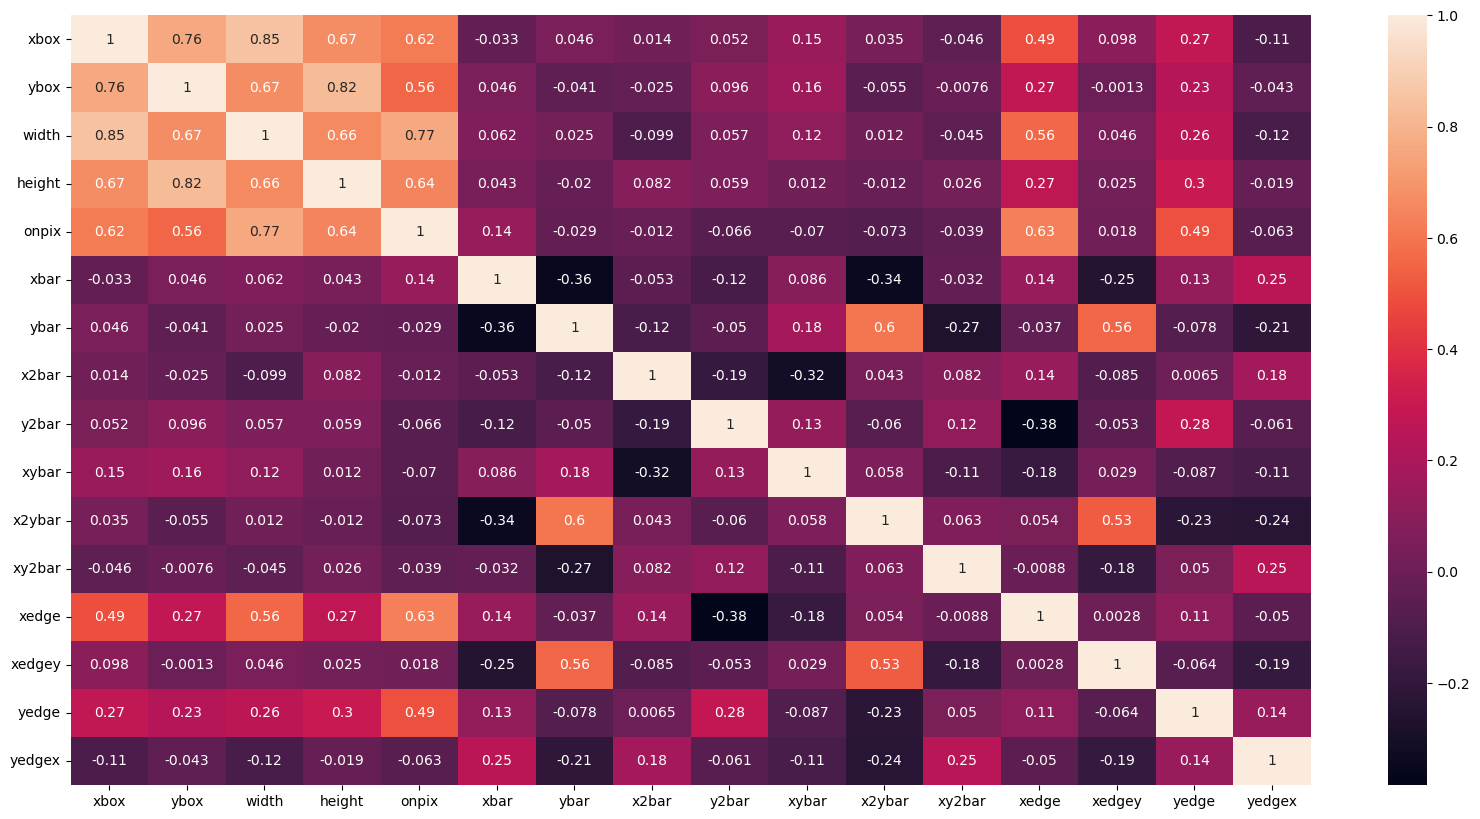

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

### Correlation with Target Column

In [26]:
data.corr()["xedgey"].sort_values(ascending=False)

xedgey    1.000000
ybar      0.555060
x2ybar    0.527239
xbox      0.098180
width     0.045658
xybar     0.029419
height    0.025359
onpix     0.017649
xedge     0.002849
ybox     -0.001336
y2bar    -0.052545
yedge    -0.064402
x2bar    -0.084820
xy2bar   -0.184927
yedgex   -0.187591
xbar     -0.253339
Name: xedgey, dtype: float64

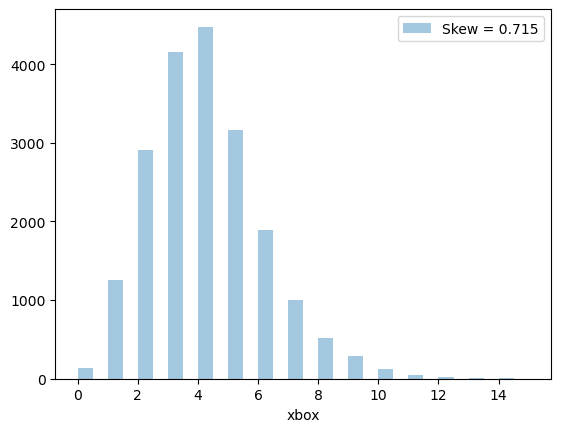

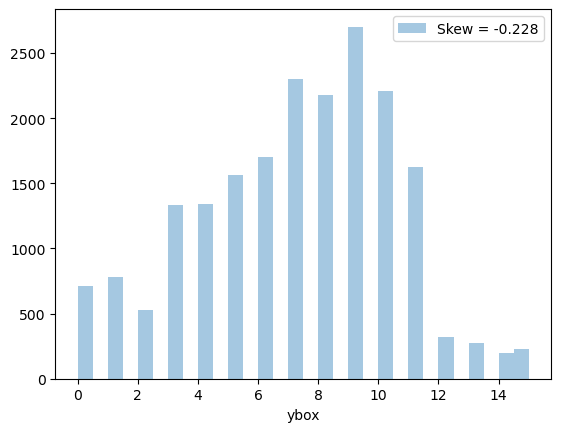

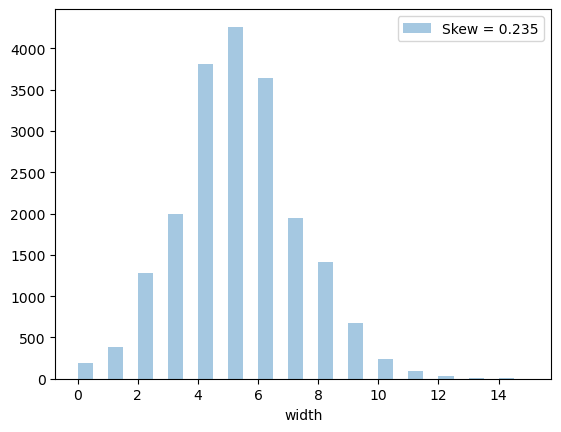

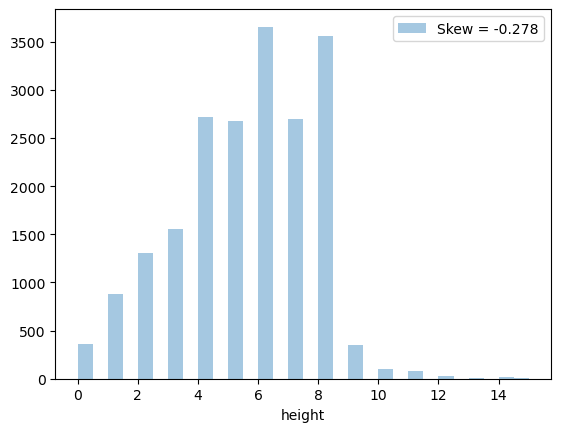

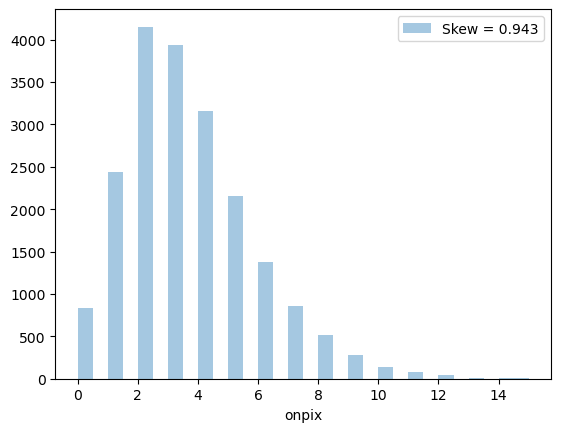

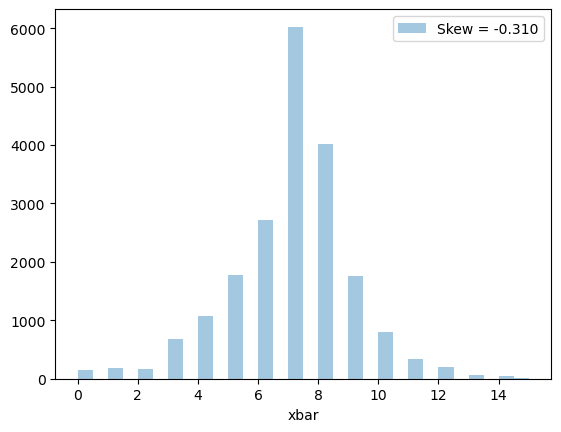

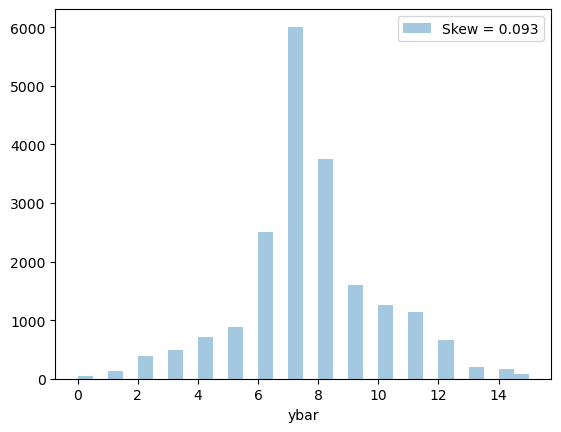

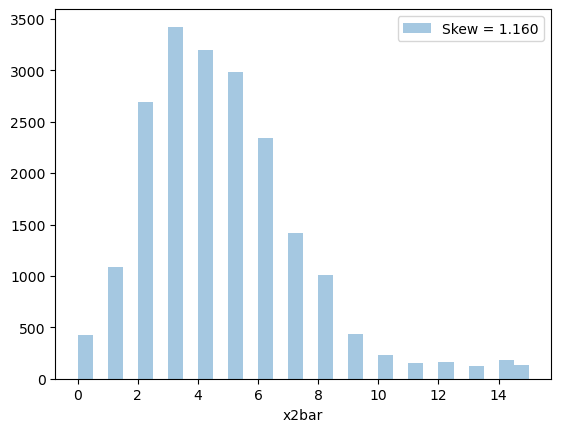

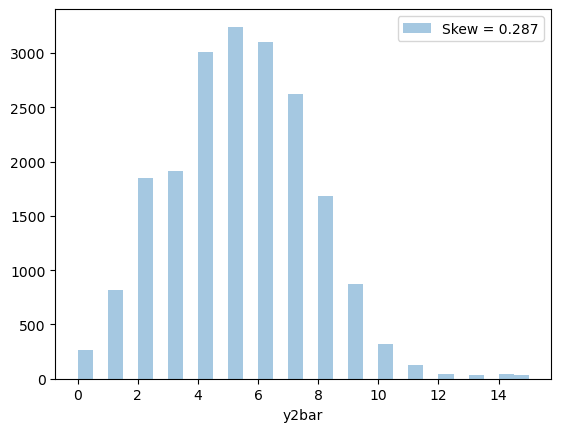

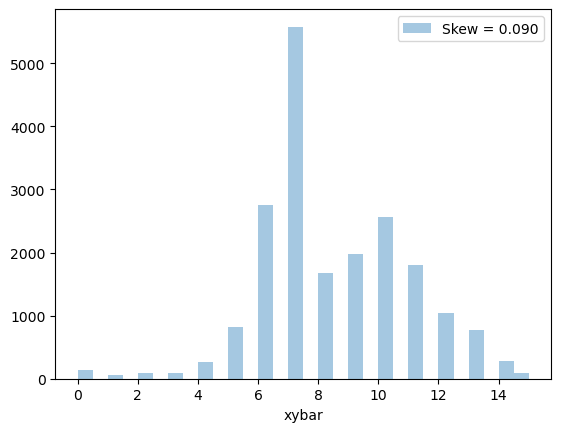

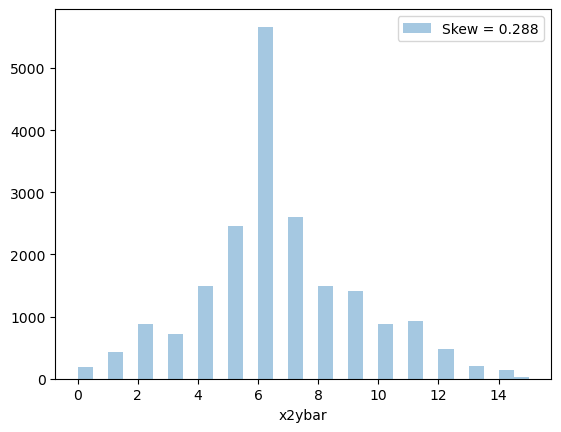

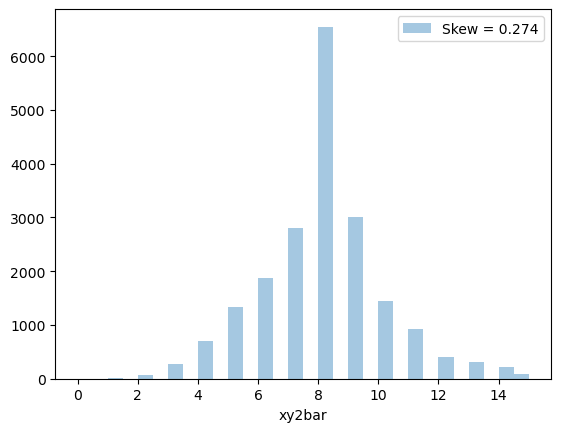

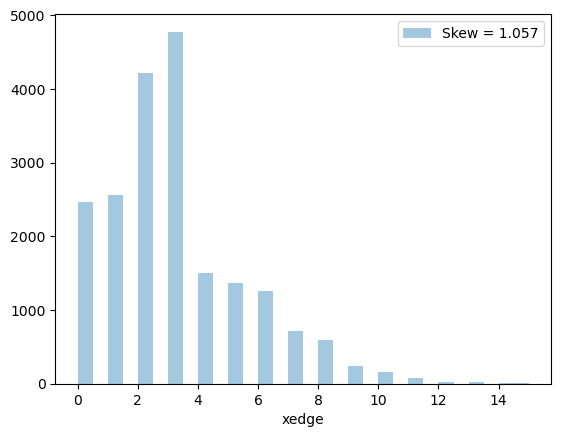

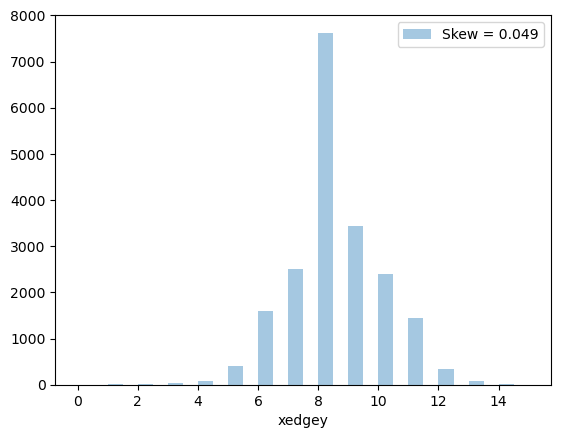

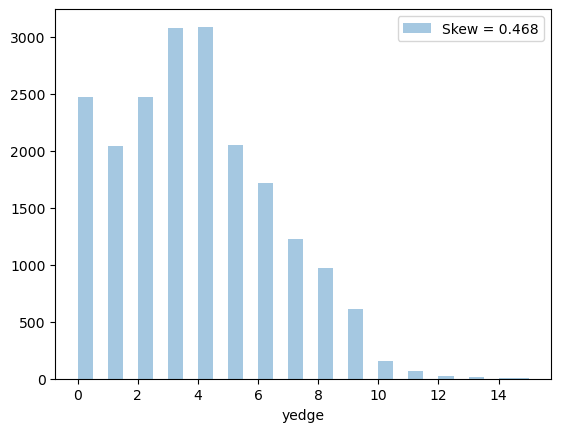

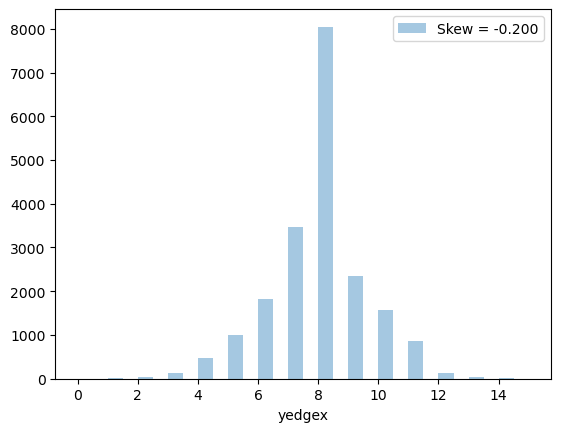

In [27]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

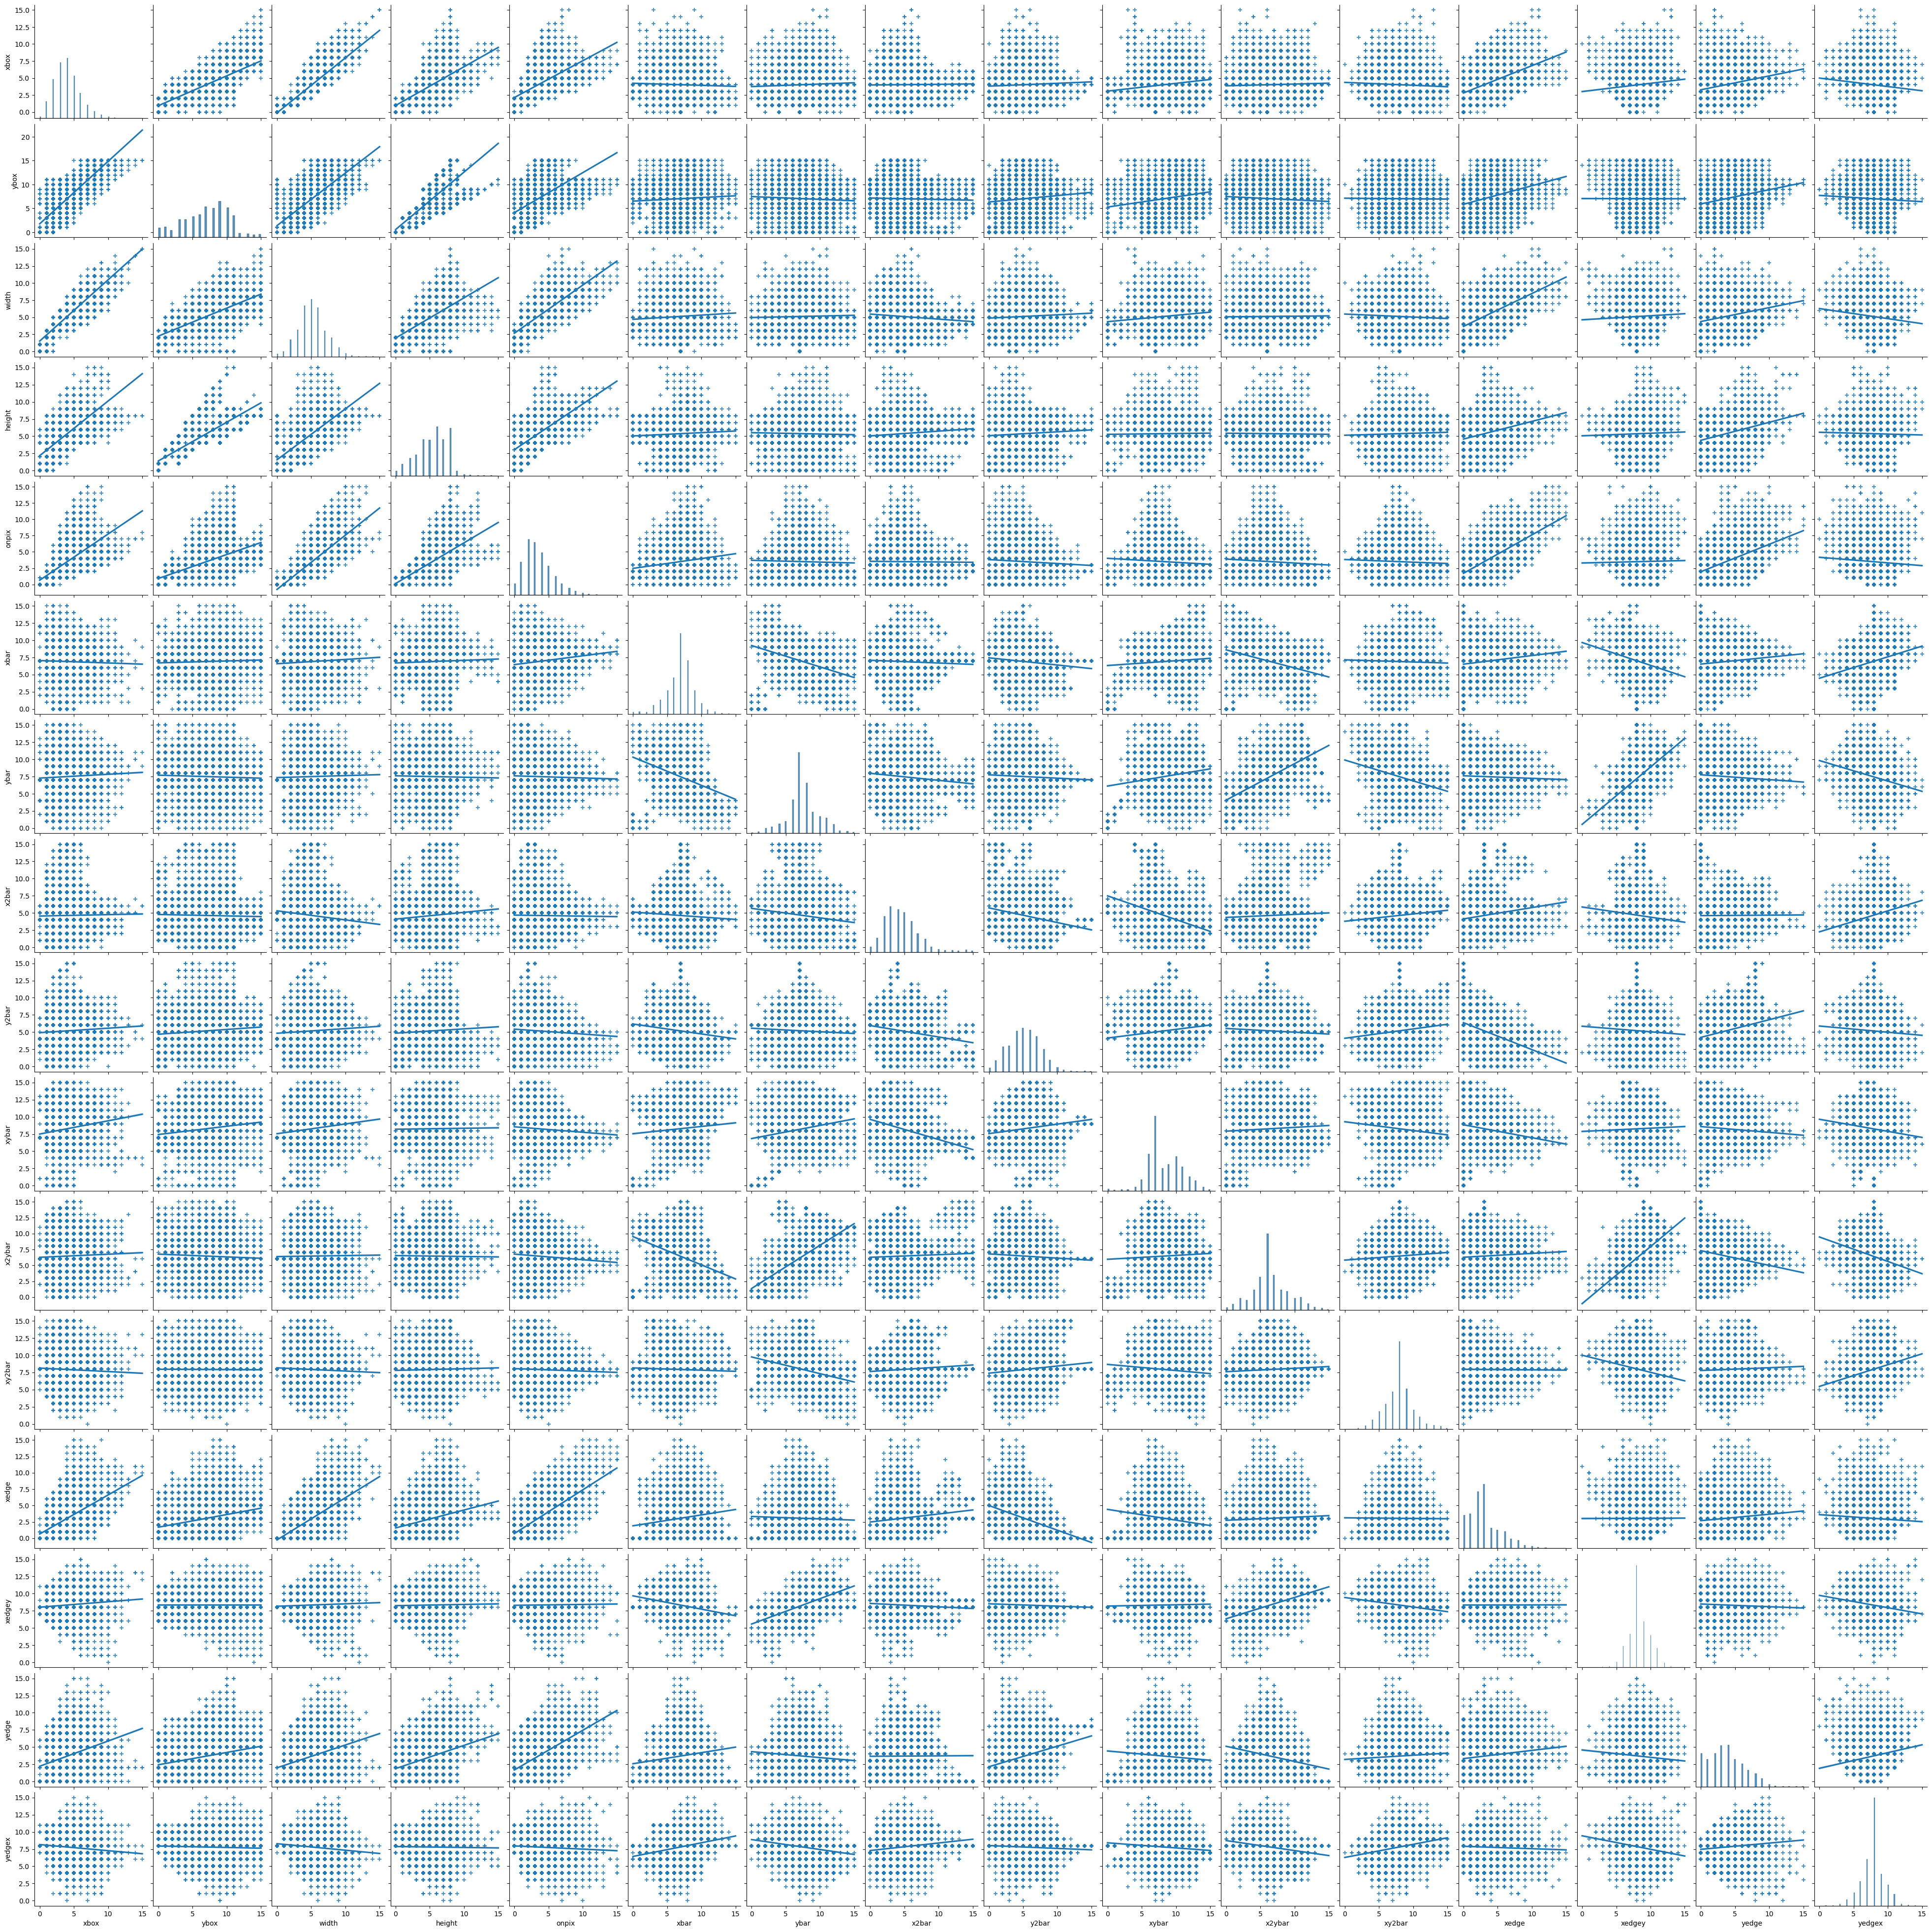

In [28]:
sns.pairplot(data,markers="+",kind='reg', diag_kind="auto")

# Data Splitting

In [29]:
data.shape

(20000, 17)

In [34]:
data.drop(["letter"],axis=1 , inplace=True)

In [35]:
data.shape

(20000, 16)

In [41]:
X = data.drop(["yedgex"],axis=1).values
y = data["yedgex"].values

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [44]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (16000, 15)
Shape of X_test:  (4000, 15)
Shape of y_train:  (16000,)
Shape of y_test: (4000,)


# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model = Sequential()

model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))

#Binary Classification
model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

# Model Training

In [50]:
model.fit(x=X_train,y=y_train,epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.1690 - mae: 4.8621 - mse: 31.1690
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2403 - mae: 1.4236 - mse: 3.2403
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3095 - mae: 1.1685 - mse: 2.3095
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0084 - mae: 1.0635 - mse: 2.0084
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8475 - mae: 1.0078 - mse: 1.8475
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7459 - mae: 0.9774 - mse: 1.7459
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7042 - mae: 0.9603 - mse: 1.7042
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6379 - mae: 0.9333 - mse: 1.6379
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5505 - mae: 0.8999 - mse: 1.5505
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5668 - mae: 0.8901 - mse: 1.5668
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1854 - mae: 0.7655 - mse: 1.1854
Epoch 64/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2418 - mae: 0.7753 - mse: 1.2418
Epoch 65/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1912 - mae: 0.7645 - mse: 1.1912
Epoch 66/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2329 - mae: 0.7759 - mse: 1.2329
Epoch 67/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2410 - mae: 0.7782 - mse: 1.2410
Epoch 68/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2351 - mae: 0.7772 - mse: 1.2351
Epoch 69/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2270 - mae: 0.7722 - mse: 1.2270
Epoch 70/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2034 - mae: 0.7646 - mse: 1.2034
Epoch 71/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2257 - mae: 0.7723 - mse: 1.2257
Epoch 72/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1939 - mae: 0.7624 - mse: 1.1939
Epoch 73/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1

In [51]:
model.history.history

{'loss': [15.69754409790039,
  2.9247517585754395,
  2.2166152000427246,
  1.958845615386963,
  1.8392243385314941,
  1.7541753053665161,
  1.6751458644866943,
  1.6117814779281616,
  1.5612562894821167,
  1.5286962985992432,
  1.5043978691101074,
  1.4917559623718262,
  1.4788020849227905,
  1.4658849239349365,
  1.4580823183059692,
  1.442557692527771,
  1.4393219947814941,
  1.432389259338379,
  1.4221595525741577,
  1.4164732694625854,
  1.4109134674072266,
  1.4054988622665405,
  1.3987772464752197,
  1.3970284461975098,
  1.3868532180786133,
  1.3860665559768677,
  1.3828521966934204,
  1.374732255935669,
  1.3660074472427368,
  1.361488699913025,
  1.3509472608566284,
  1.3461354970932007,
  1.3393691778182983,
  1.3327463865280151,
  1.3307567834854126,
  1.3252958059310913,
  1.3160024881362915,
  1.3155436515808105,
  1.3108339309692383,
  1.3060643672943115,
  1.300959825515747,
  1.2947328090667725,
  1.2963550090789795,
  1.2899466753005981,
  1.2827037572860718,
  1.28238

In [52]:
performance = pd.DataFrame(model.history.history)

In [53]:
performance

,loss,mae,mse
0,15.697544,3.102119,15.697544
1,2.924752,1.341971,2.924752
2,2.216615,1.137390,2.216615
3,1.958846,1.049649,1.958846
4,1.839224,1.005996,1.839224
...,...,...,...
95,1.201590,0.764663,1.201590
96,1.198365,0.765166,1.198365
97,1.200319,0.764201,1.200319
98,1.199242,0.762610,1.199242


<Axes: >

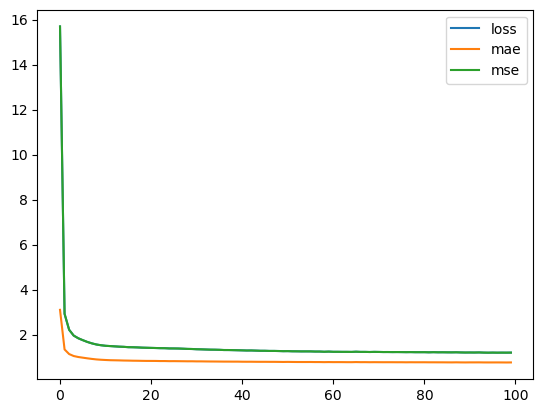

In [54]:
performance.plot()

# Retrain Model

In [55]:
model = Sequential()

model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))

#Binary Classification
model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [58]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 30.6281 - mae: 4.8239 - mse: 30.6281 - val_loss: 4.4427 - val_mae: 1.6595 - val_mse: 4.4427
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6975 - mae: 1.5133 - mse: 3.6975 - val_loss: 2.4041 - val_mae: 1.2033 - val_mse: 2.4041
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2309 - mae: 1.1518 - mse: 2.2309 - val_loss: 1.7857 - val_mae: 1.0014 - val_mse: 1.7857
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7301 - mae: 0.9779 - mse: 1.7301 - val_loss: 1.5887 - val_mae: 0.9208 - val_mse: 1.5887
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5628 - mae: 0.9075 - mse: 1.5628 - val_loss: 1.4989 - val_mae: 0.8802 - val_mse: 1.4989
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5047 - mae: 0.8736 - mse: 1.5047 - val_loss: 1.4641 - val_mae: 0.8594 - val_mse: 1.4641
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.4225 - mae: 0.8518 - mse: 1.4

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1506 - mae: 0.7561 - mse: 1.1506 - val_loss: 1.1647 - val_mae: 0.7520 - val_mse: 1.1647
Epoch 46/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1665 - mae: 0.7500 - mse: 1.1665 - val_loss: 1.1717 - val_mae: 0.7535 - val_mse: 1.1717
Epoch 47/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1608 - mae: 0.7549 - mse: 1.1608 - val_loss: 1.1787 - val_mae: 0.7658 - val_mse: 1.1787
Epoch 48/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1555 - mae: 0.7526 - mse: 1.1555 - val_loss: 1.1537 - val_mae: 0.7452 - val_mse: 1.1537
Epoch 49/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1613 - mae: 0.7594 - mse: 1.1613 - val_loss: 1.1515 - val_mae: 0.7492 - val_mse: 1.1515
Epoch 50/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1959 - mae: 0.7615 - mse: 1.1959 - val_loss: 1.1646 - val_mae: 0.7533 - val_mse: 1.1646
Epoch 51/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1734 - mae: 0.7583 - mse: 1.1734 - va

In [59]:
model.history.history

{'loss': [15.887311935424805,
  3.1929123401641846,
  2.053065776824951,
  1.675612211227417,
  1.5407592058181763,
  1.4808483123779297,
  1.4468894004821777,
  1.4214214086532593,
  1.4026449918746948,
  1.3891838788986206,
  1.381359577178955,
  1.3648408651351929,
  1.3535529375076294,
  1.347737193107605,
  1.3307960033416748,
  1.3258458375930786,
  1.31589937210083,
  1.3084112405776978,
  1.2983640432357788,
  1.2902203798294067,
  1.280259132385254,
  1.272117257118225,
  1.261735439300537,
  1.2545063495635986,
  1.247103214263916,
  1.2419902086257935,
  1.2271164655685425,
  1.2219773530960083,
  1.215641736984253,
  1.2126729488372803,
  1.20619797706604,
  1.20514976978302,
  1.2005120515823364,
  1.1910830736160278,
  1.1852883100509644,
  1.1841115951538086,
  1.1822388172149658,
  1.180229663848877,
  1.183261752128601,
  1.1732767820358276,
  1.1694351434707642,
  1.1707890033721924,
  1.169806718826294,
  1.1660863161087036,
  1.1681162118911743,
  1.1640363931655884

<Axes: >

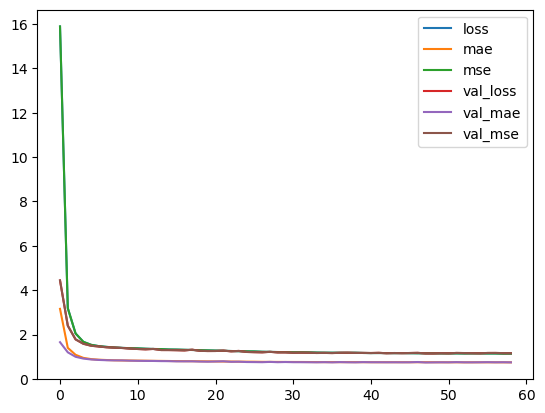

In [60]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Retrain Model

In [61]:
from tensorflow.keras.layers import Dropout

In [62]:
model = Sequential()

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))

#Binary Classification
model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [63]:
model.fit(x=X_train, y=y_train, epochs=100,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 55.6108 - mae: 7.1683 - mse: 55.6108 - val_loss: 22.6648 - val_mae: 4.5121 - val_mse: 22.6648
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 29.6286 - mae: 4.7515 - mse: 29.6286 - val_loss: 13.5683 - val_mae: 3.3925 - val_mse: 13.5683
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 22.7471 - mae: 4.0446 - mse: 22.7471 - val_loss: 9.8088 - val_mae: 2.8294 - val_mse: 9.8088
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 19.5639 - mae: 3.6845 - mse: 19.5639 - val_loss: 8.0912 - val_mae: 2.5377 - val_mse: 8.0912
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.0059 - mae: 3.2934 - mse: 16.0059 - val_loss: 6.9974 - val_mae: 2.3351 - val_mse: 6.9974
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.4340 - mae: 3.1275 - mse: 14.4340 - val_loss: 6.1216 - val_mae: 2.1565 - val_mse: 6.1216
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.7703 - mae: 2.

In [64]:
model.history.history

{'loss': [47.08827209472656,
  27.249967575073242,
  21.563257217407227,
  18.56145668029785,
  15.680304527282715,
  14.01224422454834,
  12.454266548156738,
  11.014967918395996,
  9.852239608764648,
  8.837307929992676],
 'mae': [6.426319122314453,
  4.507450580596924,
  3.9202191829681396,
  3.5763375759124756,
  3.263993740081787,
  3.078568935394287,
  2.8990724086761475,
  2.7241954803466797,
  2.566218614578247,
  2.423042058944702],
 'mse': [47.08827209472656,
  27.249967575073242,
  21.563257217407227,
  18.56145668029785,
  15.680304527282715,
  14.01224422454834,
  12.454266548156738,
  11.014967918395996,
  9.852239608764648,
  8.837307929992676],
 'val_loss': [22.664758682250977,
  13.568305015563965,
  9.808809280395508,
  8.091184616088867,
  6.997354030609131,
  6.121644496917725,
  5.424153804779053,
  5.077445030212402,
  4.731335163116455,
  4.100605487823486],
 'val_mae': [4.512140274047852,
  3.3925065994262695,
  2.8293862342834473,
  2.5376839637756348,
  2.3351

In [65]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

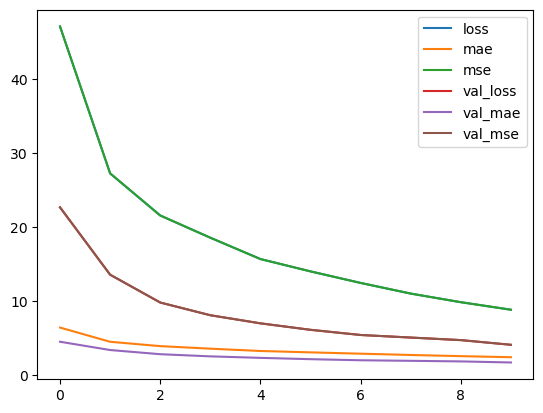

In [66]:
model_loss.plot()

# Hyperparameter tuning

In [67]:
def toFindBestParams(X_train, y_train, X_test, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    # Initialize an empty DataFrame to store results
    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer='adam', loss='mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train, batch_size=batch_trial, epochs=epochs_trial, verbose=0)

            # Calculate MAPE
            MAPE = np.mean(100 * (np.abs(y_test - model.predict(X_test)) / y_test))

            # Create a new row with current batch size, epochs, and accuracy
            new_row = pd.DataFrame([[batch_trial, epochs_trial, 100 - MAPE]], columns=['batchsize', 'epochs', 'Accuracy'])

            # Concat the new row to the bestParamTable DataFrame
            bestParamTable = pd.concat([bestParamTable, new_row], ignore_index=True)

            # Print results
            print('batch_size:', batch_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', 100 - MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(X_train, y_train, X_test, y_test)
finalParamTable

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 5 - epochs: 5 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 5 - epochs: 10 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 5 - epochs: 50 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 5 - epochs: 100 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 10 - epochs: 5 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 15 - epochs: 5 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 15 - epochs: 10 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 15 - epochs: 50 Accuracy: -inf
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
batch_size: 15 - epochs: 100 Accuracy: -

,batchsize,epochs,Accuracy
0,5,5,-inf
1,5,10,-inf
2,5,50,-inf
3,5,100,-inf
4,10,5,-inf
5,10,10,-inf
6,10,50,-inf
7,10,100,-inf
8,15,5,-inf
9,15,10,-inf


In [68]:
# getting corresponding row values of the maximum value of 'Accuracy' column
finalParamTable = finalParamTable.reset_index()
#print(finalParamTable_1)
#print(finalParamTable['Accuracy'].idxmax())
finalParamTable.iloc[finalParamTable['Accuracy'].idxmax()]

index        0.0
batchsize    5.0
epochs       5.0
Accuracy    -inf
Name: 0, dtype: float64

# Training Model - using best params

In [69]:
model = Sequential()

model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))

#Binary Classification
model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [70]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(X_train,y_train, batch_size=20 , epochs = 100, verbose=0)

In [71]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

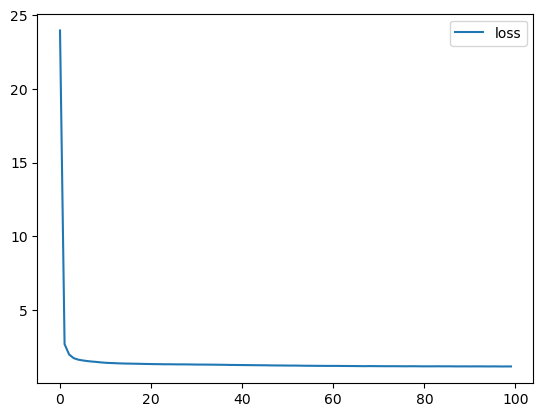

In [72]:
model_loss.plot()

# Model Evaluation

In [73]:
predictions = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [74]:
predictions

array([[9.128202 ],
       [7.386025 ],
       [7.2611156],
       ...,
       [7.9588494],
       [8.632675 ],
       [8.799603 ]], dtype=float32)

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [76]:
mean_squared_error(y_test, predictions)

1.145306133394257

In [77]:
np.sqrt(mean_squared_error(y_test,predictions))

1.070189765132454

In [78]:
mean_absolute_error(y_test, predictions)

0.7383142304420471

In [79]:
explained_variance_score(y_test, predictions)

0.5551128410921969

In [80]:
r2_score(y_test, predictions)

0.5551128395656092

# Model Deployment

In [81]:
from tensorflow.keras.models import load_model

In [82]:
# model.save('my_gem_model.h5')

In [83]:
# later_model = load_model('my_gem_model')

In [84]:
# later_model.predict(new_gem)